In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.setrecursionlimit(200000)


def sequence_alignemt(x, y, g, a):
    m = len(x)
    n = len(y)
    M = [[0 for i in range(n)] for j in range(m)]
    for i in range(m):
        M[i][0] = i*g
    for j in range(n):
        M[0][j] = j*g

    for i in range(1, m):
          for j in range(1, n):
              _a = 0 if x[i] == y[j] else a
              M[i][j] = min(_a + M[i - 1][j - 1], g + M[i - 1][j], g + M[i][j - 1])
    return M, M[m-1][n-1]


def get_sequence(x, y, g, a, M):
    diff = [[],[]]
    find_sequence(len(x) - 1, len(y) - 1, x, y, g, a, M, diff)
    diff[0].reverse()
    diff[1].reverse()
    return "".join(diff[0]), "".join(diff[1])


def find_sequence(i, j, x, y, g, a, M, diff):
    if i > 0 or j > 0:
        _a = 0 if x[i] == y[j] else a
        if M[i][j] == _a + M[i - 1][j - 1]:
            if _a == a:
                _add_to_diff(diff, "<%s>" % x[i], "<%s>" % y[j])
            _add_to_diff(diff, x[i], y[j])
            return find_sequence(i - 1, j - 1, x, y, g, a, M, diff)
        elif M[i][j] == g + M[i - 1][j]:
            _add_to_diff(diff, x[i], "*")
            return find_sequence(i - 1, j, x, y, g, a, M, diff)
        else:
            _add_to_diff(diff, "*", y[j])
            return find_sequence(i, j - 1, x, y, g, a, M, diff)
    elif j == 0 and i == 0:
        _add_to_diff(diff, x[i], y[j])


def _add_to_diff(diff, x, y):
    diff[0].append(x)
    diff[1].append(y)

In [3]:
x = "ocurrance"
y = "occurrence"
g = 0.7
a = 1

M, cost = sequence_alignemt(x, y, g, a)
print "Cost: ", cost
out_x, out_y = get_sequence(x, y, g, a, M)

print out_x
print out_y

Cost:  1.7
o*curra<a>nce
occurre<e>nce


____
###Algoritmo - Task 2

In [9]:
import random
import numpy as np
import time
from math import log
import matplotlib.pyplot as plt

z = "ABCD"
gamma = 0.7
alpha = 1

def task2():
    result = []
    for i in range(8):
        t = []
        size = 10*pow(2, i)
        for j in range(10):
            start = time.clock()
            x = [random.choice(z) for _ in range(size)]
            y = [random.choice(z) for _ in range(size)]
            M, cost = sequence_alignemt(x, y, g, a)
            out_x, out_y = get_sequence(x, y, g, a, M)
            t.append((time.clock() - start)/60)

        # Calculates the median time
        print [np.median(t), size]
        result.append([np.median(t), size])
    return result

[7.5500000000006121e-06, 10]
[1.5149999999997112e-05, 20]
[8.3250000000001373e-05, 40]
[0.00013928333333333248, 80]
[0.00037476666666666676, 160]
[0.0020455666666666684, 320]
[0.0067109833333333386, 640]
[0.02601569166666667, 1280]


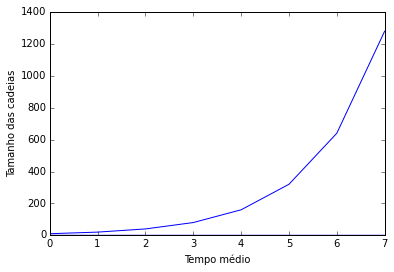

In [10]:
result = task2()
plt.plot(result,'b-')
plt.xlabel(u"Tempo médio")
plt.ylabel(u"Tamanho das cadeias")
plt.show()

Linear Space

In [6]:
from copy import deepcopy
import sys
sys.setrecursionlimit(200000)


def sequence_alignemt_linear(x, y, g, a):
    m = len(x)
    n = len(y)
    C = [i*g for i in range(m)]

#     Não é necessário, C já foi inicializado
#     for i in range(m):
#         C[i] = i*g

    for j in range(1, n):
#         L = C, isso na verdade está apenas atribuindo a L uma cópia
#         da referência ao vetor C e não copiando o vetor em si.
#         Em python, quando vc quer copia vetores, é melhor utilizar o deepcopy.
        L = deepcopy(C)
        C[0]=j*g
        for i in range(1, m):
            _a = 0 if x[i] == y[j] else a
            C[i] = min(_a + L[i - 1], g + L[i], g + C[i - 1])
    return C, C[m-1]

In [7]:
x = "ocurrance"
y = "occurrence"
g = 0.7
a = 1

M, cost = sequence_alignemt_linear(x, y, g, a)
print "Cost: ", cost

Cost:  1.7


In [8]:
import sys
sys.getrecursionlimit()

200000